---
# **Vector and matrix transpose**
---

## Import

In [21]:
import torch
torch. __version__

'1.8.1'

In [22]:
import numpy as np

## Numpy

In [27]:
nv = np.array([[1, 2, 3]])

nvT = nv.T

print(nv, end='\n\n')
print(nvT, end='\n\n')
print(nvT.T, end='\n\n')

[[1 2 3]]

[[1]
 [2]
 [3]]

[[1 2 3]]



In [31]:
nM = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

nMT = nM.T

print(nM, end='\n\n')
print(nMT, end='\n\n')
print(nMT.T, end='\n\n')

[[1 2 3]
 [4 5 6]]

[[1 4]
 [2 5]
 [3 6]]

[[1 2 3]
 [4 5 6]]



## Pytorch

In [32]:
tv = torch.Tensor([[1, 2, 3]])

tvT = tv.T

print(tv, end='\n\n')
print(tvT, end='\n\n')
print(tvT.T, end='\n\n')

tensor([[1., 2., 3.]])

tensor([[1.],
        [2.],
        [3.]])

tensor([[1., 2., 3.]])



In [33]:
tM = torch.Tensor(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)

tMT = tM.T

print(tM, end='\n\n')
print(tMT, end='\n\n')
print(tMT.T, end='\n\n')

tensor([[1., 2., 3.],
        [4., 5., 6.]])

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

tensor([[1., 2., 3.],
        [4., 5., 6.]])



## Data types

In [34]:
print(f'Variable nv is of type {type(nv)}')
print(f'Variable nM is of type {type(nM)}')
print(f'Variable tv is of type {type(tv)}')
print(f'Variable tM is of type {type(tM)}')

Variable nv is of type <class 'numpy.ndarray'>
Variable nM is of type <class 'numpy.ndarray'>
Variable tv is of type <class 'torch.Tensor'>
Variable tM is of type <class 'torch.Tensor'>


---
# **The dot product**
---

In [1]:
import numpy as np
import torch

## Numpy

In [2]:
tv1 = np.array([1, 2, 3, 4])
tv2 = np.array([0, 1, 0, -1])

print(np.dot(tv1, tv2))
print(np.sum(tv1*tv2))

-2
-2


## PyTorch

In [3]:
tv1 = torch.tensor([1, 2, 3, 4])
tv2 = torch.tensor([0, 1, 0, -1])

print(torch.dot(tv1, tv2))
print(torch.sum(tv1*tv2))

tensor(-2)
tensor(-2)


---
# **Matrix multiplication**
---

In [4]:
import numpy as np
import torch

## Numpy

In [9]:
# np.matmul(A, B) == A@B

A = np.random.randn(3,4)
B = np.random.randn(4,5)
C = np.random.randn(3,7)

print(np.round(A@B, 2), end='\n\n')
print(np.round(C.T@A, 2))

[[-0.22  1.31 -0.31  1.07  2.45]
 [-0.88 -1.36  3.72  2.11 -2.83]
 [ 0.39  0.96 -0.67  1.12  2.87]]

[[-2.33 -0.19 -1.24  0.17]
 [-1.01 -0.36 -0.48  0.02]
 [ 0.26  1.12  1.05 -0.09]
 [ 0.56  0.04  0.4  -0.07]
 [-2.83  1.91  0.14  0.1 ]
 [-2.77 -1.41 -2.15  0.21]
 [ 2.6  -0.1   0.52 -0.02]]


## PyTorch

In [15]:
A = torch.randn(3,4)
B = torch.randn(4,5)
C1 = np.random.randn(4,7)
C2 = torch.tensor(C1, dtype=torch.float)

print(np.round(A@B), end='\n\n')
print(np.round(A@C1), end='\n\n')
print(np.round(A@C2))

tensor([[ 1., -2.,  1., -2.,  1.],
        [ 2., -2.,  1., -2., -1.],
        [-2.,  1.,  1., -2.,  0.]])

tensor([[-0.,  2.,  1.,  2., -3.,  1.,  3.],
        [-1.,  1.,  2.,  3.,  2.,  1.,  1.],
        [ 1., -2., -2., -2.,  1., -1.,  0.]], dtype=torch.float64)

tensor([[-0.,  2.,  1.,  2., -3.,  1.,  3.],
        [-1.,  1.,  2.,  3.,  2.,  1.,  1.],
        [ 1., -2., -2., -2.,  1., -1.,  0.]])


---
# **Softmax**
---

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Numpy

In [41]:
z = [1, 2, 3]

num = np.exp(z)
den = np.sum(np.exp(z))
sigma = num / den

print(sigma)
print(np.sum(sigma))

[0.09003057 0.24472847 0.66524096]
1.0


In [42]:
z = np.random.randint(-5, 15, 25)

num = np.exp(z)
den = np.sum(np.exp(z))
sigma1 = num / den

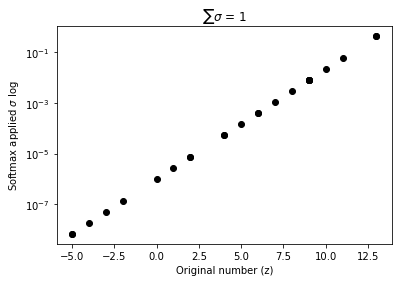

In [43]:
plt.plot(z, sigma1, 'ko')
plt.xlabel('Original number (z)')
plt.ylabel('Softmax applied $\sigma$ log')
plt.title('$\sum\sigma$ = %g' %np.sum(sigma))
plt.yscale('log')
plt.show()

## PyTorch

In [45]:
z = [1, 2, 3]

softmax = nn.Softmax(dim=0)

sigmaT = softmax( torch.Tensor(z) )

print(sigmaT)

tensor([0.0900, 0.2447, 0.6652])


## Compare results

In [50]:
r = np.corrcoef(sigma, sigmaT)[0, 1]

print(f'The two methods correlate at r = {r}')

The two methods correlate at r = 1.0


---
# **Logarithms**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

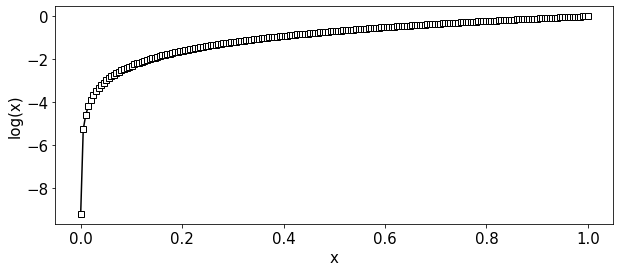

In [2]:
x = np.linspace(0.0001, 1, 200)
logx = np.log(x)

fig = plt.figure(figsize=(10,4))
plt.rcParams.update({'font.size':15})

plt.plot(x, logx, 'ks-', markerfacecolor='w')
plt.ylabel('log(x)')
plt.xlabel('x')
plt.show()

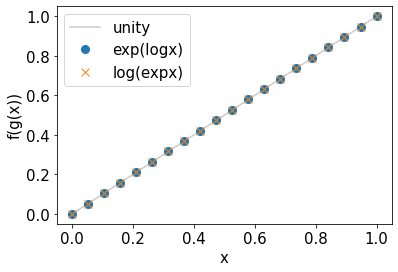

In [3]:
x = np.linspace(0.0001, 1, 20)

logx = np.log(x)
expx = np.exp(x)

plt.plot(x, x, color=[.8, .8, .8])
plt.plot(x, np.exp(logx), 'o', markersize=8)
plt.plot(x, np.log(expx), 'x', markersize=8)
plt.ylabel('f(g(x))')
plt.xlabel('x')
plt.legend(['unity', 'exp(logx)', 'log(expx)'])
plt.show()

---
# **Entropy and cross-entropy**
---

## Numpy

In [3]:
import numpy as np

### Binary entropy (only two events)

In [4]:
x = [ .25, .75]

H = 0

for p in x:
    H -= p*np.log(p)

print(f'Entropy : {H}')

Entropy : 0.5623351446188083


In [6]:
p = .25
H = - (p*np.log(p) + (1-p)*np.log(1-p))
print(f'Entropy : {H}')

Entropy : 0.5623351446188083


### Cross-entropy

In [10]:
p = [ 1, 0] # sum=1, (is cat or not cat)
q = [.25, .75] # sum=1, (model prediction cat)

H = 0

for i in range(len(p)):
    H -= p[i]*np.log(q[i])

print(f'Cross-entropy : {H}')

Entropy : 1.3862943611198906


In [14]:
H = - (p[0]*np.log(q[0]) + p[1]*np.log(q[1]))
print(f'Cross-entropy : {H}')

# simplification p[1] = 0, p[1] = 1
H = -np.log(q[0])
print(f'Cross-entropy : {H}')

Cross-entropy : 1.3862943611198906
Cross-entropy : 1.3862943611198906


## PyTorch

In [15]:
import torch
import torch.nn.functional as F

In [19]:
p_tensor = torch.Tensor([1, 0])
q_tensor = torch.Tensor([.25, .75])

F.binary_cross_entropy(q_tensor, p_tensor)

tensor(1.3863)

---
# **Min_max and argmin_argmax**
---

In [17]:
import numpy as np
import torch

## Numpy

In [18]:
v = np.array([1, 20, 2, -3])

print(v)

print(f'Min : {np.min(v)}, Max : {np.max(v)}')

minIndex = np.argmin(v)
maxIndex = np.argmax(v)

print(f'Min Index : {minIndex}, Max Index : {maxIndex}')
print(f'Min : {v[minIndex]}, Max : {v[maxIndex]}')

[ 1 20  2 -3]
Min : -3, Max : 20
Min Index : 3, Max Index : 1
Min : -3, Max : 20


In [19]:
M = np.array(
    [
        [0, 1, 10],
        [20, 8, 5]
    ]
)

print(M)
print(np.min(M))
print(np.min(M, axis=0))
print(np.min(M, axis=1))

[[ 0  1 10]
 [20  8  5]]
0
[0 1 5]
[0 5]


In [20]:
M = np.array(
    [
        [0, 1, 10],
        [20, 8, 5]
    ]
)

print(M)
print(np.argmin(M))
print(np.argmin(M, axis=0))
print(np.argmin(M, axis=1))

[[ 0  1 10]
 [20  8  5]]
0
[0 0 1]
[0 2]


## PyTorch

In [21]:
v = torch.Tensor([1, 20, 2, -3])

print(v)

print(f'Min : {torch.min(v)}, Max : {torch.max(v)}')

minIndex = torch.argmin(v)
maxIndex = torch.argmax(v)

print(f'Min Index : {minIndex}, Max Index : {maxIndex}')
print(f'Min : {v[minIndex]}, Max : {v[maxIndex]}')


tensor([ 1., 20.,  2., -3.])
Min : -3.0, Max : 20.0
Min Index : 3, Max Index : 1
Min : -3.0, Max : 20.0


In [22]:
M = torch.Tensor(
    [
        [0, 1, 10],
        [20, 8, 5]
    ]
)

min1 = torch.min(M)
min2 = torch.min(M, axis=0)
min3 = torch.min(M, axis=1)

print(min1)
print(min2)
print(min3)

tensor(0.)
torch.return_types.min(
values=tensor([0., 1., 5.]),
indices=tensor([0, 0, 1]))
torch.return_types.min(
values=tensor([0., 5.]),
indices=tensor([0, 2]))


In [23]:
min2.indices, min2.values

(tensor([0, 0, 1]), tensor([0., 1., 5.]))

In [24]:
min3.indices, min3.values

(tensor([0, 2]), tensor([0., 5.]))

In [25]:
M = torch.Tensor(
    [
        [0, 1, 10],
        [20, 8, 5]
    ]
)

print(M)
print(torch.argmin(M))
print(torch.argmin(M, axis=0))
print(torch.argmin(M, axis=1))

tensor([[ 0.,  1., 10.],
        [20.,  8.,  5.]])
tensor(0)
tensor([0, 0, 1])
tensor([0, 2])


---
# **Mean and variance**
---

In [26]:
import numpy as np

In [27]:
x = [ 1, 2, 4, 6, 5, 4, 0]

print(np.mean(x))
print( sum(x)/len(x) )

3.142857142857143
3.142857142857143


In [31]:
print( np.var(x, ddof=1) )
print( ( 1 / (len(x)-1) ) * np.sum((x - np.mean(x))**2) )

4.809523809523809
4.809523809523809


---
# **Random sampling and sampling variability**
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
x = [1, 2, 3, 4, -1, -5, 0, 1, 4, 9, 6, -9, 6, -4, 2, 1]
n = len(x)

popMean = sum(x)/n

sample = np.random.choice(x, size=5, replace=True)
sampleMean = np.mean(sample)

print(popMean)
print(sampleMean)

1.25
0.2


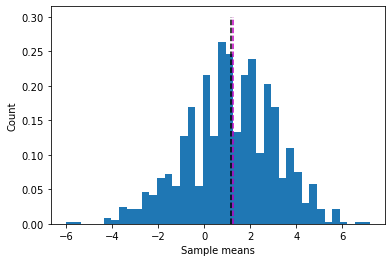

In [35]:
nExpers = 1000

sampleMeans = np.zeros(nExpers)

for i in range(nExpers):
    sample = np.random.choice(x, size=5, replace=True)
    sampleMeans[i] = np.mean(sample)

meanSampleMeans = np.mean(sampleMeans)

plt.hist(sampleMeans, bins=40, density=True)
plt.plot([popMean, popMean], [0, .3], 'm--')
plt.plot([meanSampleMeans, meanSampleMeans], [0, .3], 'k--')
plt.ylabel('Count')
plt.xlabel('Sample means')
plt.show()